# Érdekességek a matematika alkalmazásaiból

## Klaszterezés és klasszifikáció

*Gyarmathy Zsófia & Varasdi Károly*

### Jupyter notebook és Python környezet felállítás, csomagimportok

In [1]:
## Képmegjelenítéshez a notebookban:
from IPython.core.display import Image, display #használat: display(Image(filename='image.png'))

In [2]:
## Adatmanipulációhoz
import os
import zipfile
import pandas as pd
import numpy as np

In [3]:
## Gépi tanuláshoz
## előfeldolgozás
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Felügyelt és felügyelet nélküli tanulás

Gépi tanulási paradigmák:
> **Felügyelt tanulás (supervised learning):** a tanítóadatokra adottak a bemeneti értékek és a hozzá tartozó kimeneti érték.
>
> **Felügyelet nélküli tanulás (unsupervised learning):** a rendszer pusztán a bemeneti értékek alapján épít modellt az adatokra.

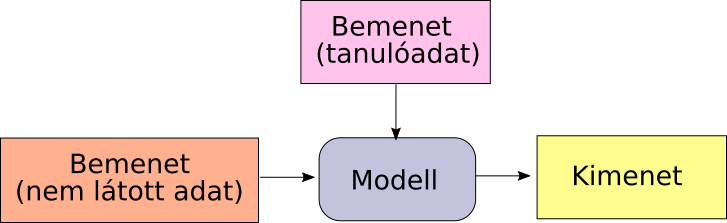

In [4]:
display(Image('abrak/IOmodell.png', width=400))

1. **Felügyelt tanulás:** A tanítóadatok adatpontjaihoz bemenet (`x`) és a kívánt **_kimenet_** (`y`) is adott.

2. **Felügyelet nélküli tanulás:** A tanítóadatok adatpontjai csak bemeneti (`x`) változókat tartalmaznak.

### Kategorizációs feladatok

#### Felügyelt (klasszifikáció) vs. felügyelet nélküli (klaszterezés)

1. **Klasszifikáció (classification):** felügyelt tanulás. Új adatok kategorizációja *előre felállított kategóriákba*, *helyesen kategorizált tanítóadatok alapján*.

2. **Klaszterezés (clustering):** felügyelet nélküli tanulás. Adathalmaz *automatikusan*, nem előzetesen felállított kategóriákba sorolása.

#### Klasszifikációs feladatok a kimenet típusa alapján

Klasszifikációs modell bemenete egy adatpontra `x`, kimenete `y`, ahol...

* `x` egy **jegyek (bemeneti/független változók) száma** hosszúságú vektor
* `y` egy... 
    * skalár (bináris kategorizáció esetén)
    * kategóriák számának megfelelő hosszúságú vektor kettőnél több kategória esetén

1. **Bináris (binary)**: igen/nem döntés
    
    * kimenet: {0, 1} eleme
    
    
2. **Többosztályos (multiclass)**: kettőnél több célosztály, egy adatpont pontosan egy osztályba sorolható (az osztályok kölcsönösen kizárják egymást)

    * kimenet: one-hot vektor
    

3. **Többcímkés (multilabel)**: több célosztály, egy adatpont több célosztályba is tartozhat (az osztályok nem kölcsönösen kizáróak)

    * kimenet: bináris vektor
    
    
+ **Regresszió (regression)**: a kimeneti változó nem kategorikus; végtelen számú lehetséges kimenet van (tipikusan valós számokkal modellezve)

    * kimenet: valós szám
    
    

Gyakorlat: milyen fajta kategorizáció?

- Facebook posztok "fake news" szűrése (a hiteltelenek automatikus törlése).

- Blogposztok automatikus taggelése a blog létező tagjei alapján.

- Emailek besorolása "munka", "személyes", "egyéb" kategóriákba.

- Egy hallgató félévi tanulmányi átlagának előrejelzése.

- CT-felvételek besorolása beteg/nem beteg kategóriákba.

- Fényképeken annotálása a rajta szereplő dolgokkal (kategóriák: ember, kutya, macska, könyv).

- Információvisszakeresés (information retrieval): egy dokumentum releváns-e egy adott keresési query szempontjából.

- A MOL részvényárfolyamának predikciója előző napi adatok alapján.

- Könyvborítók alapján könyvzsánerek meghatározása.

- Leletek alapján későbbi szív- és érrendszeri betegség valószínűségének meghatározása.

- Macskák osztályozása szín (egy- vagy kétszínű, trikolor) és nem (hím, nőstény) szerint.

Klasszifikációs modell kimeneti számértéke(i):

* Tanítóadatokban 0 vagy 1.
* Modell predikciója valós szám 0 és 1 között mint az adott kategória valószínűsége
    -> legnagyobb valószínűségű kategória kiválasztása

### A kategorizáció folyamata

**Kategorizációs algoritmusok:**

* **Naiv Bayes**: maximum poszterior valószínűségű (MAP) osztály a látott jegyek alapján
    * $p(C_k | x_1,\dots,x_n) \sim
    p(C_k,x_1,\dots ,x_n) 
    = p(C_k)\cdot p(x_1 | C_{k}) \cdot p(x_2 | C_k) \cdot \dots \cdot p(x_n | C_{k})$
    
    * feltételezés: változók egymástól függetlenek

* **szomszédok távolsága alapján**: K-means, k-nearest neighbors

* SVM, logisztikus regresszió, neurális hálózatok...

#### Mi alapján történik a kategorizáció? - Jegyek (feature) kiválasztása.

Csoportosítsuk:

1. Los Angeles
2. egy mexikói kisváros
3. Berlin

### Klasszifikáció

#### K-legközelebbi szomszéd (k nearest neighbors, kNN) klasszifikáció

A klasszifikáció a $k$ legközelebbi szomszéd osztálya alapján történik.

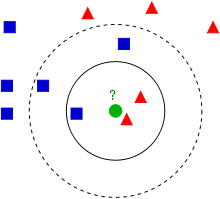

Forrás: Wikimedia


In [5]:
#display(Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png'))
display(Image('abrak/220px-KnnClassification.svg.png'))
print("Forrás: Wikimedia")

### Clustering

#### K-means clustering

A klaszterezés $k$ *kategóriába* történik. Célja: a kategóriákon belüli variancia csökkentése.

1. $k$ random "középpont" kiválasztása.
2. Minden egyéb pont hozzárendelése ahhoz a csoporthoz, amelynek átlagához legközelebb áll.
3. A csoportok átlagának update-elése.
4. 2+3 iterálása, amíg nem konvergál az algoritmus (hozzárendelések nem változnak).

#### DBSCAN klaszterezés

* sűrűség-alapú klaszterezés
* paraméterek: 
    * $\varepsilon$: adott ponttól milyen távolságon belül keres pontokat
    * *minPts*: minimálisan hány pont szükséges ahhoz, hogy egy "sűrű"-nek minősüljön
* pontok besorolása:
    * "core" pontok: *minPts* szomszédjuk van $\varepsilon$ távolságon belül
    * cluster: 
        * egymásból max $\varepsilon$-távú "core" pontokon át elérhető "core" pontok
        * a cluster valamely "core" pontjából elérhető nem-"core" pontok
    * minden más pont (ami nem "core", és nincs $\varepsilon$ távon belül "core" pont szomszéd) "noise" (zaj).
* előny/hátrány: 
    * $+$ tetszőleges "alakú" klaszterek
    * $+$ gyakorlatban gyorsabb, mint sok más klaszterező eljárás (pl. hierarchikus)
    * $-$ nem determinisztikus (ha vannak nem "core"-pontok $\varepsilon$ távra több cluster "core" pontjától)
    * $-$ feltételezés: klaszterek sűrűsége hasonló (egy $\varepsilon$ paraméter van)


#### Hierarchikus klaszterezés

* agglomeratív (bottom-up) / divizív (top-down)
* klaszterek távolsága: metrika (-> két pont távolsága) és *linkage* függvény (-> két ponthalmaz távolsága) alapján

### Távolságmértékek

* $n$ darab független (bemeneti) változó által leírt adatok: vektorok $n$-dimenziós térben.

* $a$ és $b$ adatpont közelsége/távolsága mint $\vec{a}$ és $\vec{b}$ vektorok távolsága.

#### Távolság metrikák

- Nemnegatív: 
    $$d(a,b) \geq 0$$

- Háromszög egyenlőtlenség: 
    $$d(a,c) \leq d(a, b) + d(b, c)$$

- Szimmetria: 
    $$d(a,b) = d(b, a)$$

- Nulla távolság azonosság: 
    $$d(a,b) = 0 \Leftrightarrow a = b$$

Legtöbbször használt távolságok:

* **Euklideszi távolság**: $$d(\vec{a}, \vec{b}) = |\vec{a} - \vec{b}| = \sqrt{\sum_{i=1}^{n}(a_{i} - b_{i})^2}$$

* **Manhattan távolság**: $$d(\vec{a}, \vec{b}) = \sum_{i=1}^{n}|a_{i} - b_{i}|$$
    
* Általánosításuk a **Minkowski-távolság**: $$d(\vec{a}, \vec{b}) = \Big(\sum_{i=1}^{n}|a_{i} - b_{i}|^{p}\Big)^{1/p}$$
        
Probléma: **magas dimenzionalitás átka**.

#### Koszinus hasonlósági mérték (cosine similarity): 

$$\cos(\theta )= \frac {\vec{a} \cdot \vec{b}} {|\vec{a}| |\vec{b}|}$$

* hasznos ritka adatoknál
* ha a vektorok iránya fontos, a nagysága nem (pl. dokumentumkategorizáció)
* ügyeljünk: hasonlóság, nem különbözőség
* nem távolságmetrika (feladat: a négy feltételből melyik (nem) teljesül?)


#### Változóértékek normalizálása:

In [6]:
def distance(x, y):
    return np.sqrt(sum((x-y)**2))

Egy példa (forrás: Joel Grus: Data Science From Scratch)

In [7]:
df = pd.DataFrame([[63,160,150],
                    [67,170.2,160],
                    [70,177.8,171]], \
                  columns=["magassag_in", "magassag_cm", "suly_font"], index=["A", "B", "C"])
df


,magassag_in,magassag_cm,suly_font
A,63,160.0,150
B,67,170.2,160
C,70,177.8,171


In [8]:
print("Súly fontban, magasság inch-ben:")
a, b, c = [df.iloc[i, [0,2]].values for i in range(3)]
print("B és A távolsága:", distance(a, b))
print("B és C távolsága:", distance(c, b))

Súly fontban, magasság inch-ben:
B és A távolsága: 10.770329614269007
B és C távolsága: 11.40175425099138


In [9]:
print("Súly fontban, magasság cm-ben:")
a, b, c = [df.iloc[i, 1:3].values for i in range(3)]
print("B és A távolsága:", distance(a, b))
print("B és C távolsága:", distance(c, b))

Súly fontban, magasság cm-ben:
B és A távolsága: 14.284257068535268
B és C távolsága: 13.370115930686627


B szomszédja egyszer A, egyszer C, ugyanazon magasságra! $\Rightarrow$ **Adatok normalizálása**, tipikusan:

* z-értékre: $z = \frac{(x - \mu)}{\sigma}$, vagy
* $[0,1]$ intervallumra

In [10]:
zvals = StandardScaler().fit_transform(df.values)
pd.DataFrame(zvals, columns=df.columns)

,magassag_in,magassag_cm,suly_font
0,-1.278724,-1.279834,-1.204849
1,0.116248,0.118842,-0.038866
2,1.162476,1.160992,1.243715


In [11]:
scaledvals = MinMaxScaler().fit_transform(df.values)
pd.DataFrame(scaledvals, columns=df.columns)

,magassag_in,magassag_cm,suly_font
0,0.000000,0.000000,0.00000
1,0.571429,0.573034,0.47619
2,1.000000,1.000000,1.00000
